<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_220806_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-NN 알고리즘 활용 실습**
---
K-NN 알고리즘을 활용한 농구 선수 포지션 예측 실습

#### **라이브러리 import**


In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

In [25]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [26]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

#### **데이터 시각화**

스틸, 2점 슛 데이터 시각화

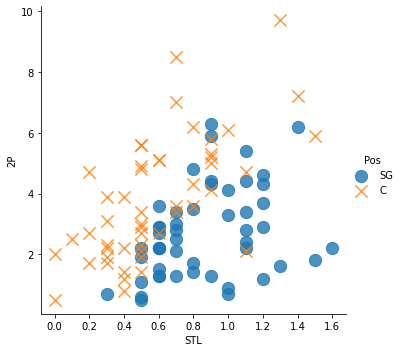

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# x축은 스틸, y 축은 2점슛 데이터 fit_reg 회귀 직선, scatter_kws 점의 크기, markers 포인트 모양
sns.lmplot(x='STL', y='2P', data=df, fit_reg=False,
           scatter_kws={"s": 150},
           markers=['o', 'x'],
           hue="Pos")

블로킹, 3점 슛 데이터 시각화

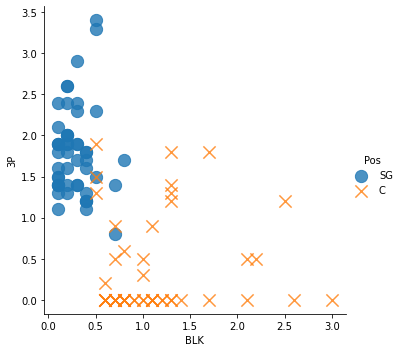

In [28]:
# x축은 블로킹, y 축은 3점슛 데이터
sns.lmplot(x='BLK', y='3P', data=df, fit_reg=False,
           scatter_kws={"s": 150},
           markers=['o', 'x'],
           hue="Pos")

리바운드, 3점 슛 데이터 시각화

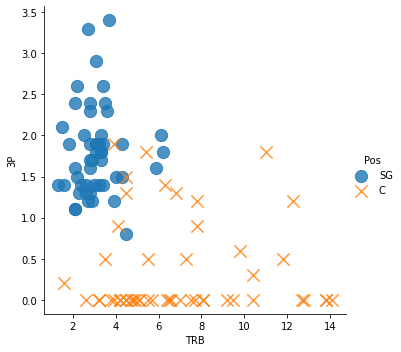

In [29]:
# x축은 리바운드, y 축은 3점슛 데이터
sns.lmplot(x='TRB', y='3P', data=df, fit_reg=False,
           scatter_kws={"s": 150},
           markers=['o', 'x'],
           hue="Pos")

#### **데이터 다듬기**
> 불필요한 데이터 정리

In [30]:
# inplace = True 를 하면 데이터를 대체하는 것(복사가 아니라 기존 데이터 없애고 새로운 데이터 생성)
df.drop(['2P', "AST", "STL"], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


#### **데이터 나누기**
> 데이터set 분리

In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

print(train.shape[0])
print(test.shape[0])

80
20


#### **라이브러리 import**


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### **최적의 K-NN Parameter 찾기**


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2     # 전체 데이터의 절반 정도만 추려보기 위함
k_list = []
for i in range(3, max_k_range, 2):  # k는 1일 수 없고 홀수여야 하므로 3부터 2씩 추려냄
  k_list.append(i)

In [42]:
cross_validation_scores = []
x_train = train[["3P", "BLK", "TRB"]]
y_train = train[["Pos"]]

In [43]:
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                           cv=10, scoring='accuracy')
  cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.9125,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.8625,
 0.8625,
 0.85,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.8125]

#### **K의 변화에 따른 정확도 도식화**

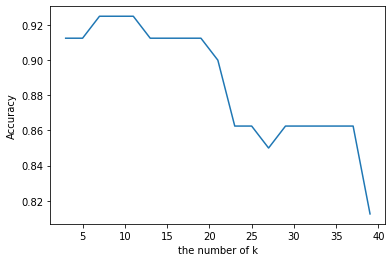

In [45]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [47]:
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("the best number of k: "+str(k))

the best number of k: 7


#### **K-NN 모델 테스트**

In [48]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[["3P", "BLK", "TRB"]]
y_train = train[["Pos"]]

knn.fit(x_train, y_train.values.ravel())

x_test = test[["3P", "BLK", "TRB"]]
y_test = test[["Pos"]]
pred = knn.predict(x_test)

print("Accuracy: " + str(accuracy_score(y_test.values.ravel(), pred)))

comparison = pd.DataFrame({"predictation": pred, 'ground_truth': y_test.values.ravel()})
comparison.head(10)

Accuracy: 0.9


,predictation,ground_truth
0,C,C
1,SG,SG
2,SG,SG
3,C,C
4,C,C
5,SG,SG
6,C,C
7,C,C
8,C,C
9,SG,SG
